# Trabalho Final de Machine Learning
## Etapa 4: Análise Exploratória de Dados

**Projeto:** Modelagem de Previsão de Aprovação de Empréstimos

**Equipe:**
- Gabriel M. Zavarize
- Nicolas B. Pereira
- Nícolas M. Cardoso
- Pedro H. H. Marques
- Wilian V. Fernandes

Realizar análise exploratória do conjunto de dados de treino:
1. Estatísticas descritivas
2. Análise de distribuições
3. Análise do desbalanceamento das classes
4. Análise de correlações
5. Visualizações e insights
6. Identificação de padrões entre aprovados e rejeitados

## 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
%matplotlib inline

## 2. Carregamento dos Dados Processados

dados que foram preparados na Etapa 3.

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').squeeze()  # Converter para Series

# Criar DataFrame combinado
df_train_eda = X_train.copy()
df_train_eda['loan_status'] = y_train

print("DADOS CARREGADOS")
print(f"Shape: {df_train_eda.shape}")
print(f"Registros: {len(df_train_eda)}")
print(f"Features: {len(X_train.columns)}")
print(f"\nPrimeiras linhas:")
display(df_train_eda.head())

DADOS CARREGADOS
Shape: (3600, 18)
Registros: 3600
Features: 17

Primeiras linhas:


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,credit_income_ratio,total_assets,assets_income_ratio,loan_assets_ratio,high_debt,low_cibil,education_encoded,self_employed_encoded,loan_status
0,1,2388099.0,37599491,14,370.0,24333847.0,7059358,5895413,1178552,15.744528,38467170.0,16.107862,0.977444,1,1,1,0,0
1,1,7543546.0,19262472,8,342.0,21928991.0,12980955,12836483,461736,2.553504,48208165.0,6.390650,0.399569,0,1,0,0,0
2,5,1185043.0,28574570,20,670.0,17667166.0,10833189,20836151,9551596,24.112686,58888102.0,49.692798,0.485235,1,0,1,1,1
3,2,2013241.0,36892063,18,393.0,20517646.0,2462908,13663642,14533387,18.324713,51177583.0,25.420495,0.720864,1,1,0,1,0
4,5,6747762.0,2651892,12,651.0,13620037.0,4940295,4484127,3481917,0.393003,26526376.0,3.931137,0.099972,0,0,1,1,1


## 3. Análise do Desbalanceamento das Classes

In [3]:
target_counts = df_train_eda['loan_status'].value_counts()
target_pct = df_train_eda['loan_status'].value_counts(normalize=True) * 100

print("DISTRIBUIÇÃO DA TARGET")
print(f"\nAprovados (1): {target_counts[1]} ({target_pct[1]:.1f}%)")
print(f"Rejeitados (0): {target_counts[0]} ({target_pct[0]:.1f}%)")
print(f"\nAprovados/Rejeitados: {target_counts[1]/target_counts[0]:.2f}:1")

DISTRIBUIÇÃO DA TARGET

Aprovados (1): 2376 (66.0%)
Rejeitados (0): 1224 (34.0%)

Aprovados/Rejeitados: 1.94:1


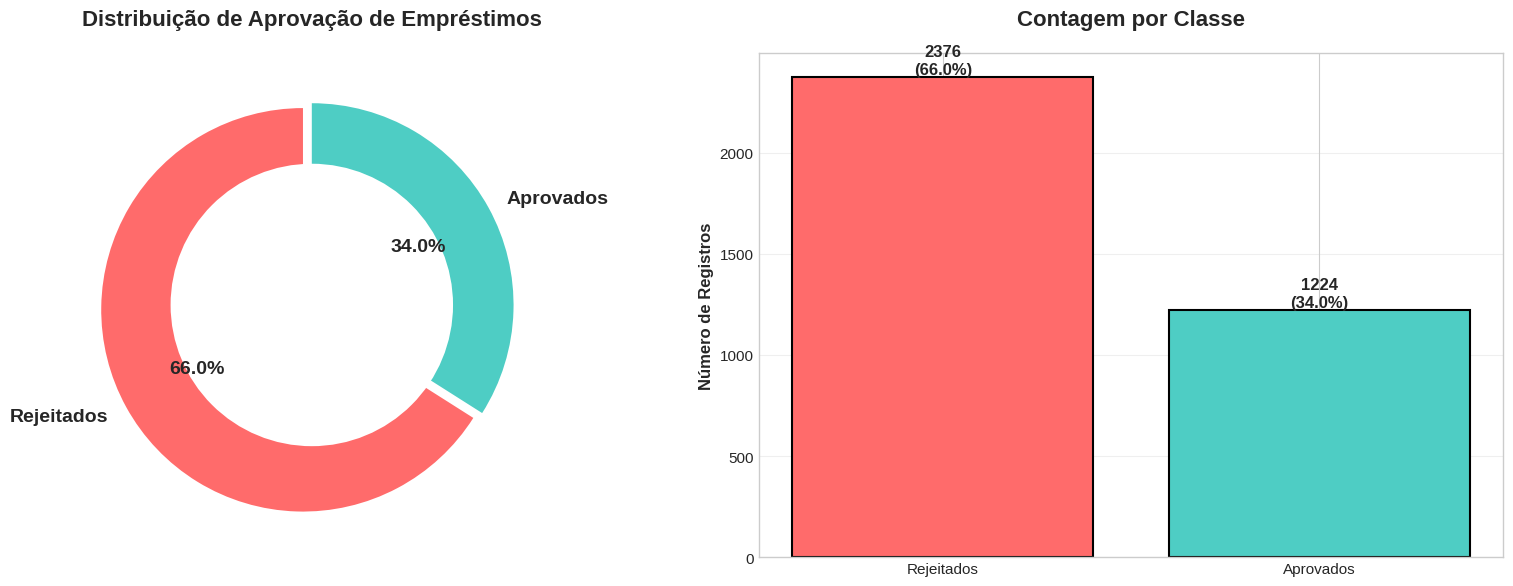


O PROBLEMA DO DESBALANCEAMENTO

O dataset está DESBALANCEADO: 66.0% Aprovados vs 34.0% Rejeitados
   • Acurácia é uma métrica INÚTIL Aqui
   • Um modelo que sempre prediz 'Aprovado' teria 66.0% de acurácia
   • Mas não serviria para NADA na prática

Nosso foco deve ser:
   • RECALL: Quantos dos 'Rejeitados' conseguimos prever corretamente?
   • Score: Capacidade do modelo de distinguir as classes


In [5]:
#Gráfico de Rosca
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de Rosca
colors = ['#FF6B6B', '#4ECDC4']  # Vermelho para Rejeitado, Verde-azulado para Aprovado
explode = (0.05, 0)  # Destacar Rejeitados

wedges, texts, autotexts = ax1.pie(
    target_counts,
    labels=['Rejeitados', 'Aprovados'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 14, 'weight': 'bold'}
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(centre_circle)
ax1.set_title('Distribuição de Aprovação de Empréstimos', fontsize=16, weight='bold', pad=20)

bars = ax2.bar(['Rejeitados', 'Aprovados'], target_counts, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Número de Registros', fontsize=12, weight='bold')
ax2.set_title('Contagem por Classe', fontsize=16, weight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(df_train_eda)*100:.1f}%)',
             ha='center', va='bottom', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("O PROBLEMA DO DESBALANCEAMENTO")
print("="*80)
print(f"\nO dataset está DESBALANCEADO: {target_pct[1]:.1f}% Aprovados vs {target_pct[0]:.1f}% Rejeitados")
print("   • Acurácia é uma métrica INÚTIL Aqui")
print(f"   • Um modelo que sempre prediz 'Aprovado' teria {target_pct[1]:.1f}% de acurácia")
print("   • Mas não serviria para NADA na prática")
print("\nNosso foco deve ser:")
print("   • RECALL: Quantos dos 'Rejeitados' conseguimos prever corretamente?")
print("   • Score: Capacidade do modelo de distinguir as classes")
print("="*80)

## 4. Estatísticas Descritivas por Classe

Comparar aprovados e rejeitados.

In [6]:
# Estatísticas por classe
print("ESTATÍSTICAS DESCRITIVAS POR CLASSE")
print("\nAprovados (loan_status = 1):")
display(df_train_eda[df_train_eda['loan_status'] == 1].describe().T)

print("\nRejeitados (loan_status = 0):")
display(df_train_eda[df_train_eda['loan_status'] == 0].describe().T)

ESTATÍSTICAS DESCRITIVAS POR CLASSE

Aprovados (loan_status = 1):


,count,mean,std,min,25%,50%,75%,max
no_of_dependents,2376.0,2.468434e+00,1.700233e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
income_annum,2376.0,5.557739e+06,2.725416e+06,2.097050e+05,3.346589e+06,5.726491e+06,7.936440e+06,9.896755e+06
loan_amount,2376.0,1.750980e+07,1.114130e+07,3.045540e+05,7.619959e+06,1.634201e+07,2.658668e+07,3.947455e+07
loan_term,2376.0,1.107912e+01,5.729669e+00,2.000000e+00,6.000000e+00,1.000000e+01,1.600000e+01,2.000000e+01
cibil_score,2376.0,6.765939e+02,1.496233e+02,3.000000e+02,5.745000e+02,6.990000e+02,8.030000e+02,9.000000e+02
residential_assets_value,2376.0,1.487741e+07,8.400186e+06,-8.280800e+04,7.699066e+06,1.507017e+07,2.199180e+07,2.908696e+07
commercial_assets_value,2376.0,9.814717e+06,5.510605e+06,4.844000e+03,5.047468e+06,9.908544e+06,1.442086e+07,1.939300e+07
luxury_assets_value,2376.0,1.265873e+07,7.196502e+06,9.614000e+03,6.588852e+06,1.260339e+07,1.886698e+07,2.499414e+07
bank_asset_value,2376.0,7.650343e+06,4.277254e+06,6.902000e+03,3.970410e+06,7.715504e+06,1.130766e+07,1.499435e+07
credit_income_ratio,2376.0,5.840545e+00,1.094848e+01,3.470623e-02,1.426942e+00,2.942509e+00,5.261995e+00,1.353756e+02



Rejeitados (loan_status = 0):


,count,mean,std,min,25%,50%,75%,max
no_of_dependents,1224.0,2.486111e+00,1.703194e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
income_annum,1224.0,4.163691e+06,2.643245e+06,2.001840e+05,1.913548e+06,3.790642e+06,6.235204e+06,9.893470e+06
loan_amount,1224.0,2.426948e+07,9.945614e+06,3.987820e+05,1.690728e+07,2.556554e+07,3.263189e+07,3.947613e+07
loan_term,1224.0,1.124346e+01,5.833297e+00,2.000000e+00,6.000000e+00,1.200000e+01,1.600000e+01,2.000000e+01
cibil_score,1224.0,4.531846e+02,1.111975e+02,3.000000e+02,3.610000e+02,4.330000e+02,5.270000e+02,8.930000e+02
residential_assets_value,1224.0,1.373378e+07,8.252818e+06,-9.603900e+04,6.794249e+06,1.382269e+07,2.036556e+07,2.909976e+07
commercial_assets_value,1224.0,9.510042e+06,5.542118e+06,2.111800e+04,4.916128e+06,9.346482e+06,1.416940e+07,1.938848e+07
luxury_assets_value,1224.0,1.167951e+07,7.053390e+06,3.113500e+04,5.606008e+06,1.147882e+07,1.783315e+07,2.498331e+07
bank_asset_value,1224.0,7.182626e+06,4.290393e+06,7.792000e+03,3.526132e+06,6.747839e+06,1.089613e+07,1.499543e+07
credit_income_ratio,1224.0,1.191015e+01,1.819196e+01,4.713652e-02,4.045045e+00,6.042482e+00,1.121496e+01,1.529310e+02


## 5. Análise da Feature: Relação Crédito/Renda

In [7]:
# Análise comparativa da relação crédito/renda
approved = df_train_eda[df_train_eda['loan_status'] == 1]['credit_income_ratio']
rejected = df_train_eda[df_train_eda['loan_status'] == 0]['credit_income_ratio']

print("RELAÇÃO CRÉDITO/RENDA POR CLASSE")
print(f"\nAprovados:")
print(f"  Média: {approved.mean():.2f}")
print(f"  Mediana: {approved.median():.2f}")
print(f"  Desvio Padrão: {approved.std():.2f}")

print(f"\nRejeitados:")
print(f"  Média: {rejected.mean():.2f}")
print(f"  Mediana: {rejected.median():.2f}")
print(f"  Desvio Padrão: {rejected.std():.2f}")

# Teste estatístico
t_stat, p_value = stats.ttest_ind(approved, rejected)
print(f"\nTeste t de Student:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4e}")
if p_value < 0.05:
    print("Diferença entre as classes!")
else:
    print("Diferença NÃO significativa")

RELAÇÃO CRÉDITO/RENDA POR CLASSE

Aprovados:
  Média: 5.84
  Mediana: 2.94
  Desvio Padrão: 10.95

Rejeitados:
  Média: 11.91
  Mediana: 6.04
  Desvio Padrão: 18.19

Teste t de Student:
  t-statistic: -12.4625
  p-value: 6.2267e-35
Diferença entre as classes!


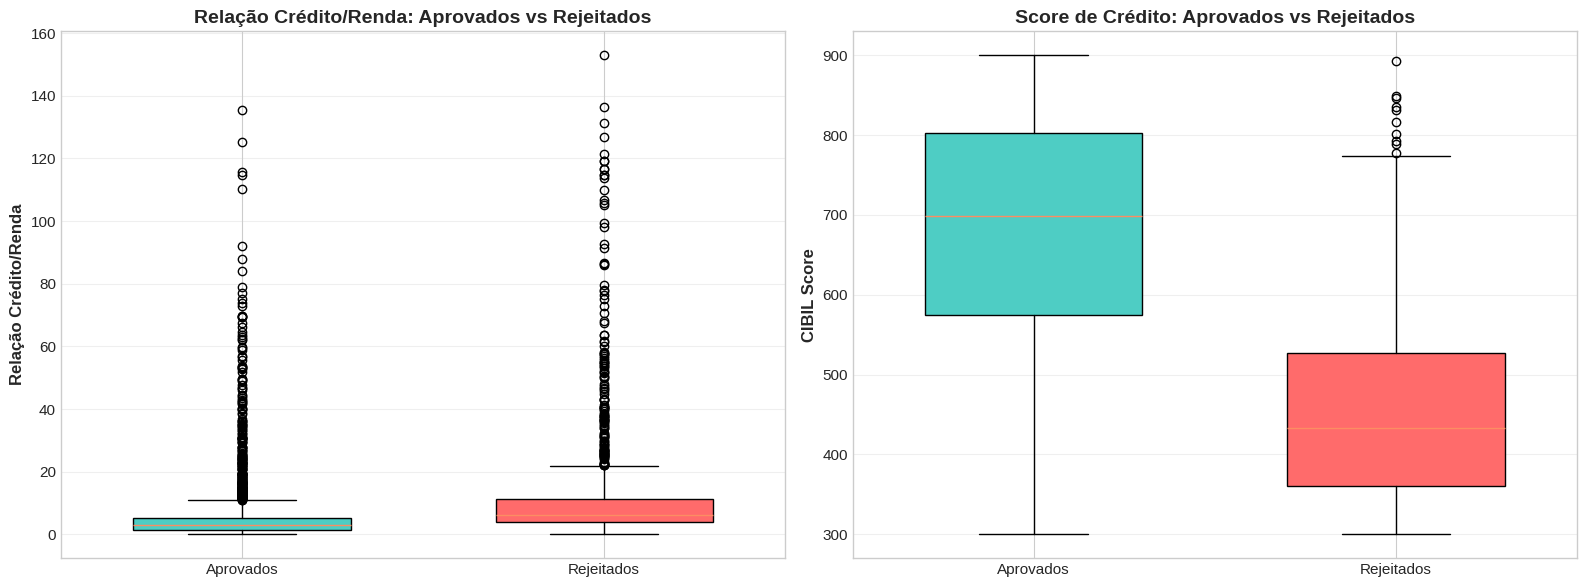

PERFIL DO CLIENTE DE RISCO

1. Clientes REJEITADOS tendem a ter:
Relação Crédito/Renda MAIOR (endividamento mais alto)
Score MENOR (histórico de crédito pior)


In [9]:
# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot 1: Relação Crédito/Renda
data_to_plot = [approved, rejected]
bp1 = axes[0].boxplot(data_to_plot, labels=['Aprovados', 'Rejeitados'],
                       patch_artist=True, widths=0.6)
for patch, color in zip(bp1['boxes'], ['#4ECDC4', '#FF6B6B']):
    patch.set_facecolor(color)
axes[0].set_ylabel('Relação Crédito/Renda', fontsize=12, weight='bold')
axes[0].set_title('Relação Crédito/Renda: Aprovados vs Rejeitados', fontsize=14, weight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Boxplot 2: Score
approved_cibil = df_train_eda[df_train_eda['loan_status'] == 1]['cibil_score']
rejected_cibil = df_train_eda[df_train_eda['loan_status'] == 0]['cibil_score']
data_to_plot2 = [approved_cibil, rejected_cibil]
bp2 = axes[1].boxplot(data_to_plot2, labels=['Aprovados', 'Rejeitados'],
                       patch_artist=True, widths=0.6)
for patch, color in zip(bp2['boxes'], ['#4ECDC4', '#FF6B6B']):
    patch.set_facecolor(color)
axes[1].set_ylabel('CIBIL Score', fontsize=12, weight='bold')
axes[1].set_title('Score de Crédito: Aprovados vs Rejeitados', fontsize=14, weight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("PERFIL DO CLIENTE DE RISCO")
print("\n1. Clientes REJEITADOS tendem a ter:")
print(f"Relação Crédito/Renda MAIOR (endividamento mais alto)")
print(f"Score MENOR (histórico de crédito pior)")

## 6. Distribuição de Variáveis Numéricas

In [ ]:
# Selecionar principais variáveis numéricas
key_numeric_vars = ['income_annum', 'loan_amount', 'cibil_score', 'loan_term',
                     'credit_income_ratio', 'total_assets']

# Histogramas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, var in enumerate(key_numeric_vars):
    axes[idx].hist(df_train_eda[var], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(var, fontsize=11, weight='bold')
    axes[idx].set_ylabel('Frequência', fontsize=11)
    axes[idx].set_title(f'Distribuição de {var}', fontsize=12, weight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribuição das Principais Variáveis Numéricas', fontsize=16, weight='bold', y=1.02)
plt.show()

## 7. Análise de Correlação

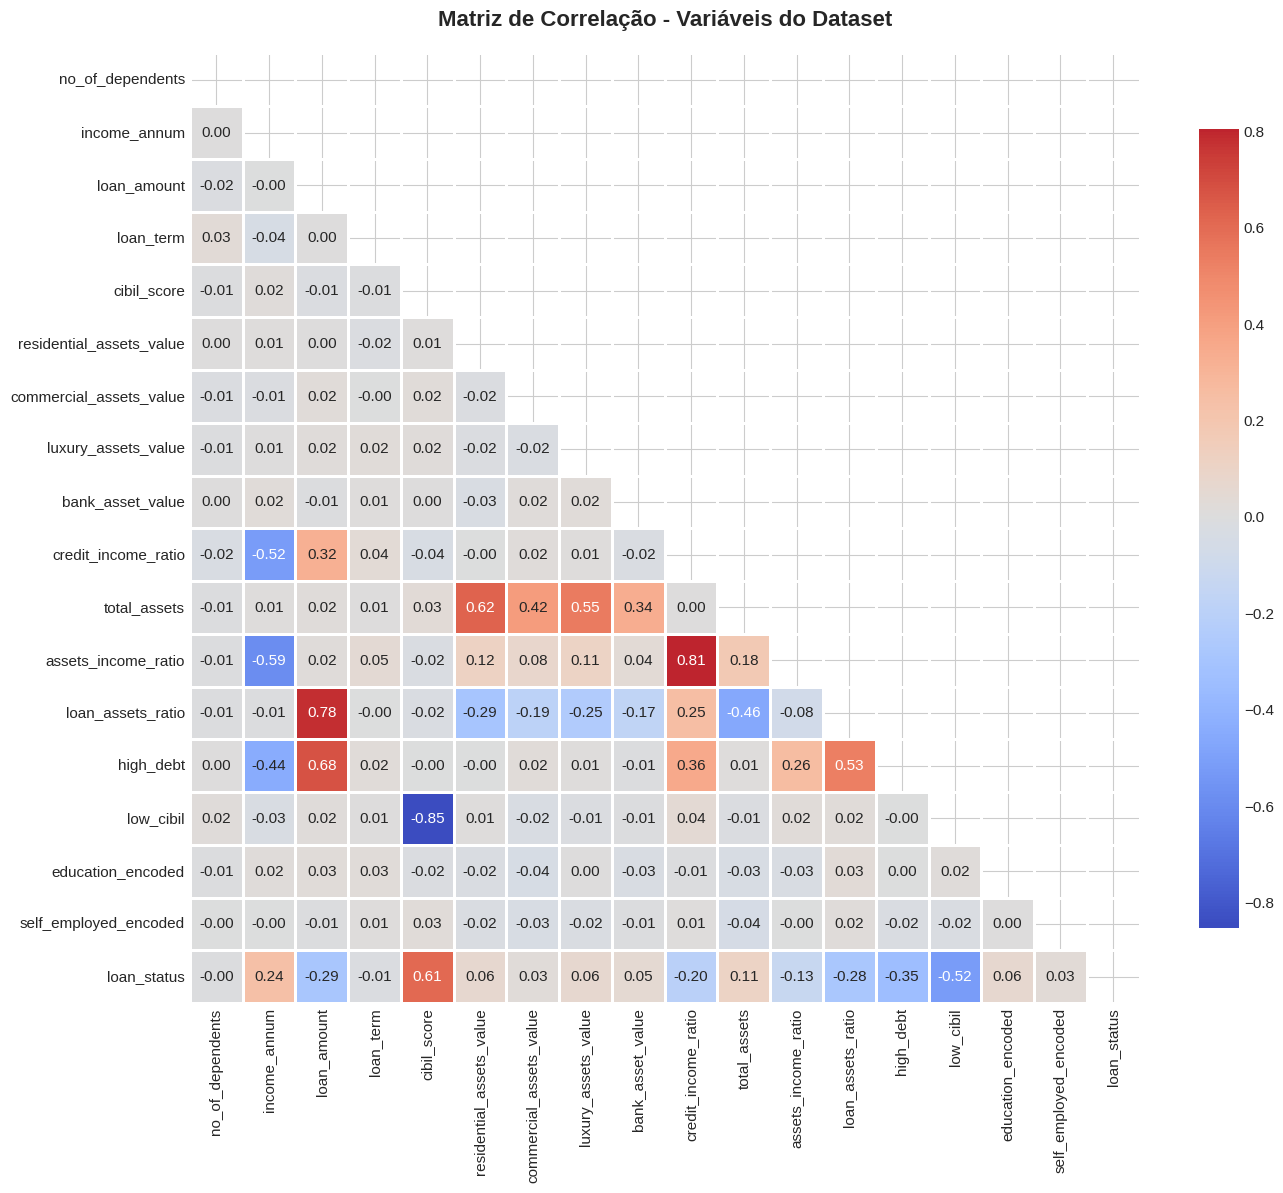

In [10]:
# Matriz de correlação
correlation_matrix = df_train_eda.corr()

# Mapa de Calor
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis do Dataset', fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

CORRELAÇÃO COM LOAN_STATUS (TARGET)

Variáveis com mais APROVAÇÃO:


,loan_status
loan_status,1.000000
cibil_score,0.609290
income_annum,0.237827
total_assets,0.106555
luxury_assets_value,0.064775
residential_assets_value,0.064758
education_encoded,0.063008
bank_asset_value,0.051691
self_employed_encoded,0.027983
commercial_assets_value,0.026138


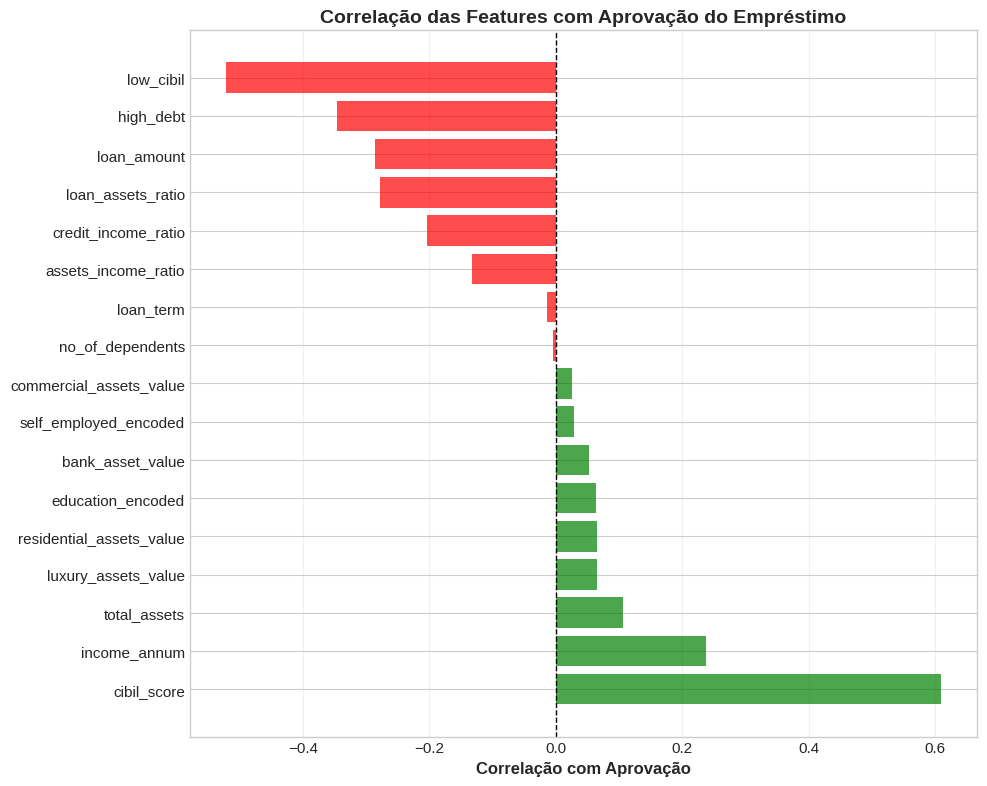

In [11]:
# Correlação com a variável target
target_correlation = correlation_matrix['loan_status'].sort_values(ascending=False)

print("CORRELAÇÃO COM LOAN_STATUS (TARGET)")
print("\nVariáveis com mais APROVAÇÃO:")
display(target_correlation.head(10))

# Visualização
plt.figure(figsize=(10, 8))
target_correlation_filtered = target_correlation[target_correlation.index != 'loan_status']
colors = ['green' if x > 0 else 'red' for x in target_correlation_filtered]
plt.barh(range(len(target_correlation_filtered)), target_correlation_filtered, color=colors, alpha=0.7)
plt.yticks(range(len(target_correlation_filtered)), target_correlation_filtered.index)
plt.xlabel('Correlação com Aprovação', fontsize=12, weight='bold')
plt.title('Correlação das Features com Aprovação do Empréstimo', fontsize=14, weight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Análise de Variáveis Categóricas

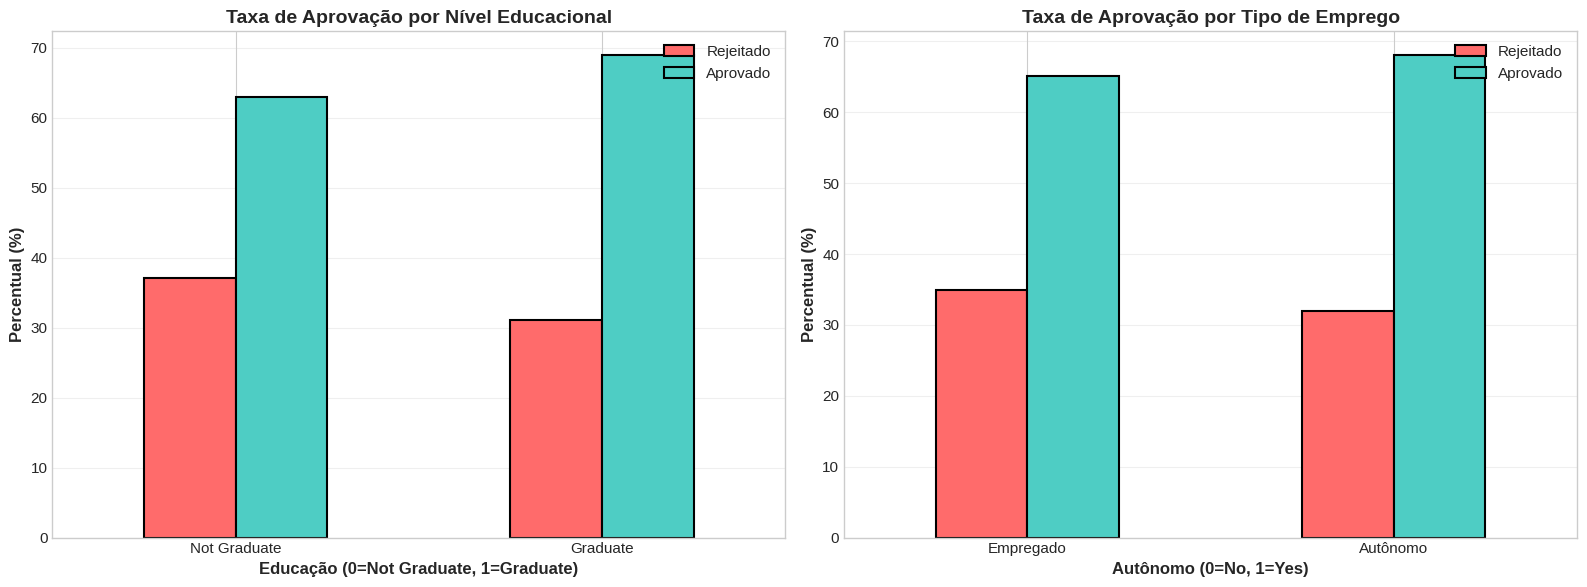


TAXA DE APROVAÇÃO POR CATEGORIA 

Educação:
  Não Graduado: 62.9% aprovados
  Graduado: 68.9% aprovados

Tipo de Emprego:
  Empregado: 65.1% aprovados
  Autônomo: 68.0% aprovados


In [12]:
# Análise de educação vs aprovação
education_approval = pd.crosstab(df_train_eda['education_encoded'],
                                  df_train_eda['loan_status'],
                                  normalize='index') * 100

# Análise de empreendedores vs aprovação
employment_approval = pd.crosstab(df_train_eda['self_employed_encoded'],
                                   df_train_eda['loan_status'],
                                   normalize='index') * 100

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Educação
education_approval.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'],
                        edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Educação (0=Not Graduate, 1=Graduate)', fontsize=12, weight='bold')
axes[0].set_ylabel('Percentual (%)', fontsize=12, weight='bold')
axes[0].set_title('Taxa de Aprovação por Nível Educacional', fontsize=14, weight='bold')
axes[0].legend(['Rejeitado', 'Aprovado'], loc='upper right')
axes[0].set_xticklabels(['Not Graduate', 'Graduate'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Emprego
employment_approval.plot(kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4'],
                          edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Autônomo (0=No, 1=Yes)', fontsize=12, weight='bold')
axes[1].set_ylabel('Percentual (%)', fontsize=12, weight='bold')
axes[1].set_title('Taxa de Aprovação por Tipo de Emprego', fontsize=14, weight='bold')
axes[1].legend(['Rejeitado', 'Aprovado'], loc='upper right')
axes[1].set_xticklabels(['Empregado', 'Autônomo'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTAXA DE APROVAÇÃO POR CATEGORIA ")
print(f"\nEducação:")
print(f"  Não Graduado: {education_approval.loc[0, 1]:.1f}% aprovados")
print(f"  Graduado: {education_approval.loc[1, 1]:.1f}% aprovados")
print(f"\nTipo de Emprego:")
print(f"  Empregado: {employment_approval.loc[0, 1]:.1f}% aprovados")
print(f"  Autônomo: {employment_approval.loc[1, 1]:.1f}% aprovados")

## 9. Análise Bivariada

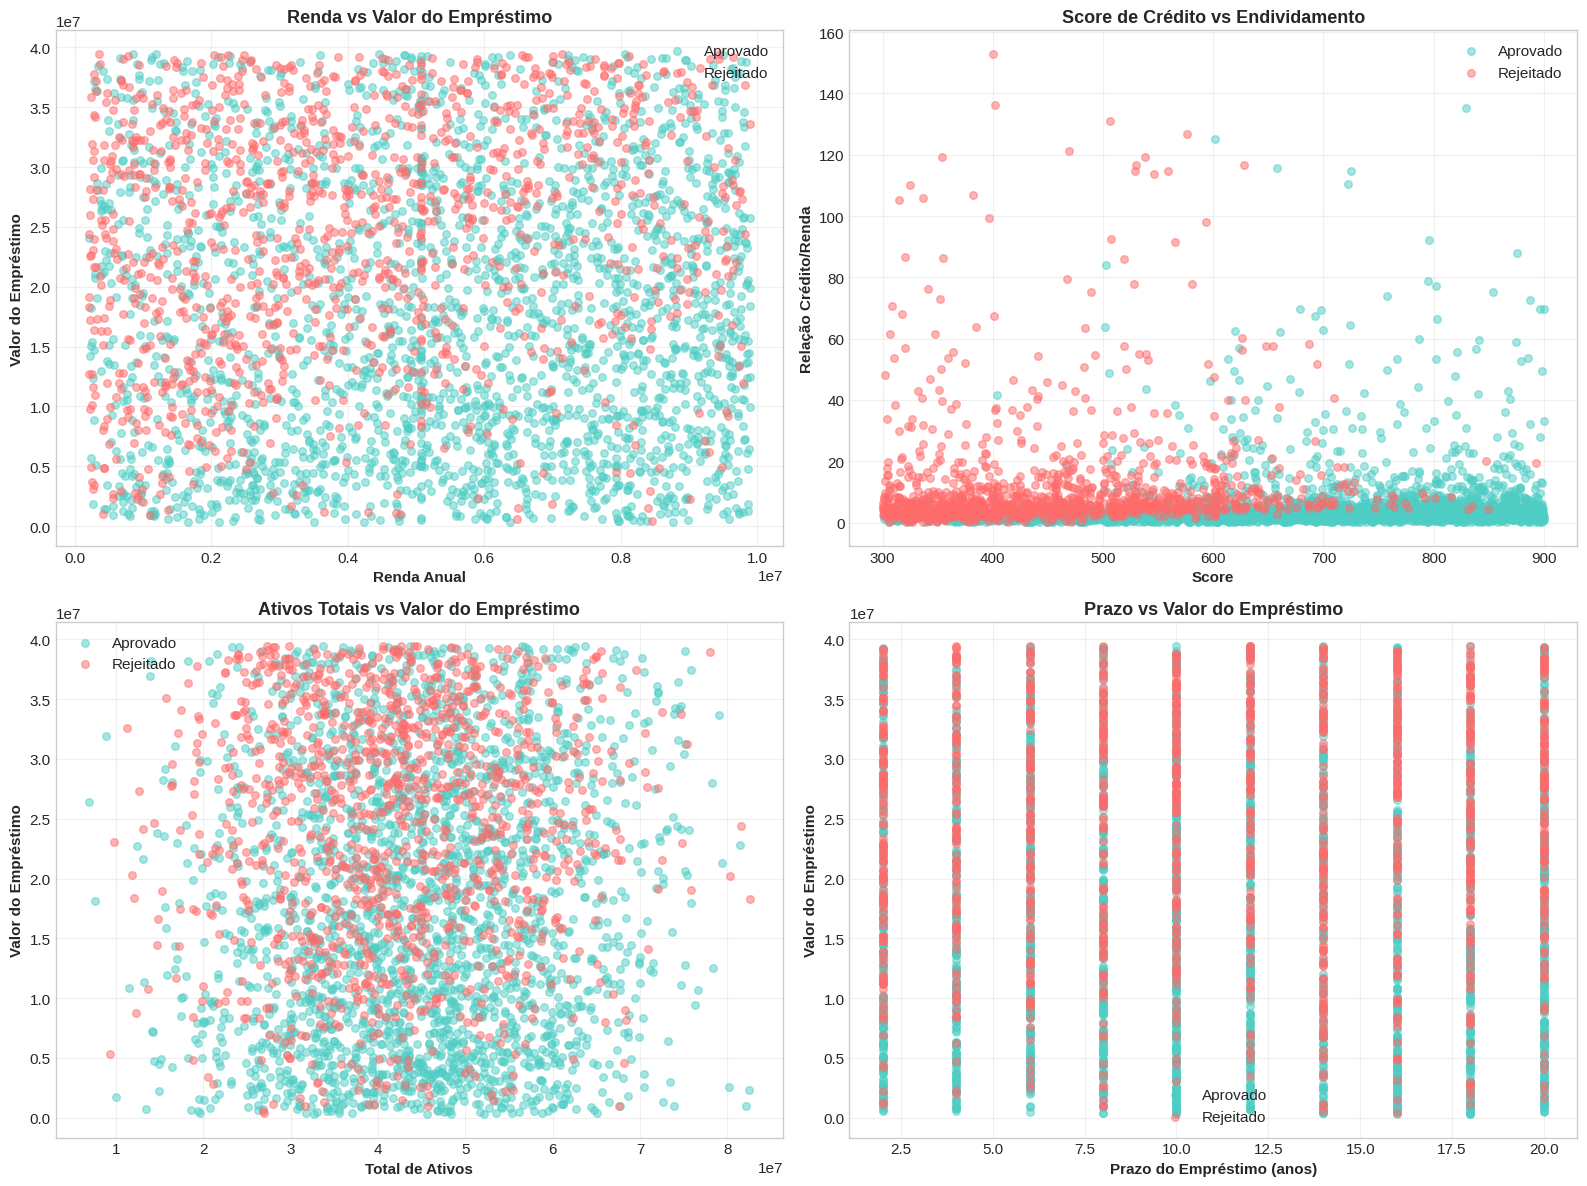

In [13]:
# Scatter plots das relações
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Renda versus Empréstimo
for status, color, label in [(1, '#4ECDC4', 'Aprovado'), (0, '#FF6B6B', 'Rejeitado')]:
    data = df_train_eda[df_train_eda['loan_status'] == status]
    axes[0, 0].scatter(data['income_annum'], data['loan_amount'],
                       c=color, alpha=0.5, s=30, label=label)
axes[0, 0].set_xlabel('Renda Anual', fontsize=11, weight='bold')
axes[0, 0].set_ylabel('Valor do Empréstimo', fontsize=11, weight='bold')
axes[0, 0].set_title('Renda vs Valor do Empréstimo', fontsize=13, weight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Score vs Renda
for status, color, label in [(1, '#4ECDC4', 'Aprovado'), (0, '#FF6B6B', 'Rejeitado')]:
    data = df_train_eda[df_train_eda['loan_status'] == status]
    axes[0, 1].scatter(data['cibil_score'], data['credit_income_ratio'],
                       c=color, alpha=0.5, s=30, label=label)
axes[0, 1].set_xlabel('Score', fontsize=11, weight='bold')
axes[0, 1].set_ylabel('Relação Crédito/Renda', fontsize=11, weight='bold')
axes[0, 1].set_title('Score de Crédito vs Endividamento', fontsize=13, weight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: Total de Bens vs Quantidade de empréstimo
for status, color, label in [(1, '#4ECDC4', 'Aprovado'), (0, '#FF6B6B', 'Rejeitado')]:
    data = df_train_eda[df_train_eda['loan_status'] == status]
    axes[1, 0].scatter(data['total_assets'], data['loan_amount'],
                       c=color, alpha=0.5, s=30, label=label)
axes[1, 0].set_xlabel('Total de Ativos', fontsize=11, weight='bold')
axes[1, 0].set_ylabel('Valor do Empréstimo', fontsize=11, weight='bold')
axes[1, 0].set_title('Ativos Totais vs Valor do Empréstimo', fontsize=13, weight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 4: Termos do COntrato vs Total de Empréstimo
for status, color, label in [(1, '#4ECDC4', 'Aprovado'), (0, '#FF6B6B', 'Rejeitado')]:
    data = df_train_eda[df_train_eda['loan_status'] == status]
    axes[1, 1].scatter(data['loan_term'], data['loan_amount'],
                       c=color, alpha=0.5, s=30, label=label)
axes[1, 1].set_xlabel('Prazo do Empréstimo (anos)', fontsize=11, weight='bold')
axes[1, 1].set_ylabel('Valor do Empréstimo', fontsize=11, weight='bold')
axes[1, 1].set_title('Prazo vs Valor do Empréstimo', fontsize=13, weight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Análise de Dependentes

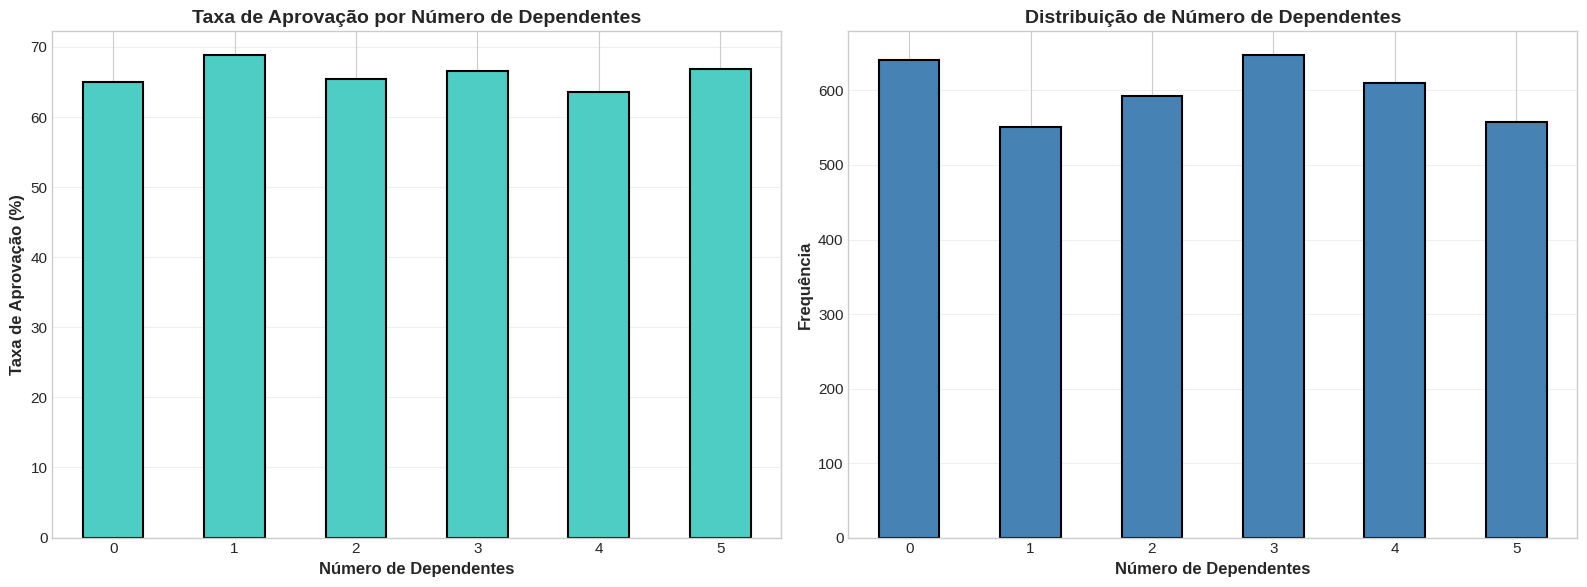

In [14]:
# Análise de número de dependentes vs aprovação
dependents_approval = pd.crosstab(df_train_eda['no_of_dependents'],
                                   df_train_eda['loan_status'],
                                   normalize='index') * 100

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico: Taxa de aprovação por número de dependentes
dependents_approval[1].plot(kind='bar', ax=axes[0], color='#4ECDC4',
                             edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Número de Dependentes', fontsize=12, weight='bold')
axes[0].set_ylabel('Taxa de Aprovação (%)', fontsize=12, weight='bold')
axes[0].set_title('Taxa de Aprovação por Número de Dependentes', fontsize=14, weight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico: Distribuição de dependentes
df_train_eda['no_of_dependents'].value_counts().sort_index().plot(kind='bar',
                                                                    ax=axes[1],
                                                                    color='steelblue',
                                                                    edgecolor='black',
                                                                    linewidth=1.5)
axes[1].set_xlabel('Número de Dependentes', fontsize=12, weight='bold')
axes[1].set_ylabel('Frequência', fontsize=12, weight='bold')
axes[1].set_title('Distribuição de Número de Dependentes', fontsize=14, weight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Resumo dos Principais Insights

In [15]:
print("RESUMO DOS PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA")

print("\n1. DESBALANCEAMENTO DAS CLASSES")
print(f"   {target_pct[1]:.1f}% Aprovados vs {target_pct[0]:.1f}% Rejeitados")
print("   Acurácia NÃO é uma boa métrica")
print("   Foco em RECALL e AUC Score")
print("   Necessário usar técnicas de balanceamento (SMOTE, scale_pos_weight)")

print("\n2. FEATURES MAIS DISCRIMINATIVAS")
print("   Relação Crédito/Renda - MAIS IMPORTANTE")
print("   Score - Forte correlação com aprovação")
print("   Total de Ativos - Indicador de capacidade financeira")

print("\n3. PERFIL DO CLIENTE DE RISCO (Rejeitado)")
print(f"   Relação Crédito/Renda MAIOR: {rejected.mean():.2f} vs {approved.mean():.2f}")
print(f"   Score MENOR: {rejected_cibil.mean():.0f} vs {approved_cibil.mean():.0f}")
print("   Menor capacidade de pagamento")

print("\n4. CORRELAÇÕES IMPORTANTES")
top_3_corr = target_correlation[target_correlation.index != 'loan_status'].head(3)
for feature, corr in top_3_corr.items():
    print(f"   {feature}: {corr:.3f}")

RESUMO DOS PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA

1. DESBALANCEAMENTO DAS CLASSES
   66.0% Aprovados vs 34.0% Rejeitados
   Acurácia NÃO é uma boa métrica
   Foco em RECALL e AUC Score
   Necessário usar técnicas de balanceamento (SMOTE, scale_pos_weight)

2. FEATURES MAIS DISCRIMINATIVAS
   Relação Crédito/Renda - MAIS IMPORTANTE
   Score - Forte correlação com aprovação
   Total de Ativos - Indicador de capacidade financeira

3. PERFIL DO CLIENTE DE RISCO (Rejeitado)
   Relação Crédito/Renda MAIOR: 11.91 vs 5.84
   Score MENOR: 453 vs 677
   Menor capacidade de pagamento

4. CORRELAÇÕES IMPORTANTES
   cibil_score: 0.609
   income_annum: 0.238
   total_assets: 0.107


## 12. Insights

gráficos e estatísticas

In [16]:
# Criar diretório para gráficos
import os
os.makedirs('presentation_charts', exist_ok=True)

# Salvar estatísticas principais em CSV
insights_summary = pd.DataFrame({
    'Métrica': ['Total de Registros', 'Aprovados (%)', 'Rejeitados (%)',
                'Média Credit/Income (Aprovados)', 'Média Credit/Income (Rejeitados)',
                'Média CIBIL (Aprovados)', 'Média CIBIL (Rejeitados)'],
    'Valor': [len(df_train_eda), f"{target_pct[1]:.1f}", f"{target_pct[0]:.1f}",
              f"{approved.mean():.2f}", f"{rejected.mean():.2f}",
              f"{approved_cibil.mean():.0f}", f"{rejected_cibil.mean():.0f}"]
})

insights_summary.to_csv('presentation_charts/eda_insights_summary.csv', index=False)